# 선형 회귀  
linear regression

In [57]:
# 농어 데이터 준비
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [58]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)

lr.predict([[50]])

array([1241.83860323])

In [60]:
print(lr.coef_, lr.intercept_) # 기울기(계수;coefficient,가중치;weight)와 절편

[39.01714496] -709.0186449535477


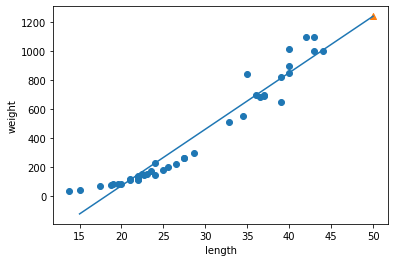

In [61]:
import matplotlib.pyplot as plt

plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [62]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


테스트 점수가 낮고
**무게를 음수값으로 예측하는 문제가 있다.**


## 다항 회귀  
polynomial regression

In [63]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [64]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [65]:
print(lr.coef_, lr.intercept_)
print(type(lr.coef_))

[  1.01433211 -21.55792498] 116.0502107827827
<class 'numpy.ndarray'>


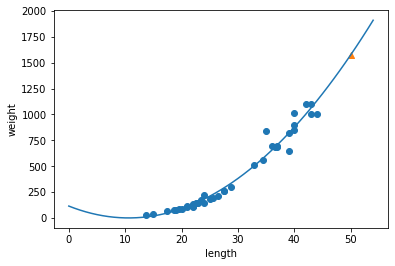

In [66]:
point = np.arange(0,55)
plt.scatter(train_input,train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.scatter(50,1573.9,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [67]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


길이가 10이하일 때 무게가 올라가는 문제가 있다.

### 3차 방정식으로 만들어보자

In [68]:
train_3poly = np.column_stack((train_input**3,train_input**2,train_input))
test_3poly = np.column_stack((test_input**3,test_input**2,test_input))
print(train_3poly.shape, test_3poly.shape)

(42, 3) (14, 3)


In [69]:
lr = LinearRegression()
lr.fit(train_3poly,train_target)

print(lr.predict([[50**3,50**2,50]]))

[1379.41727785]


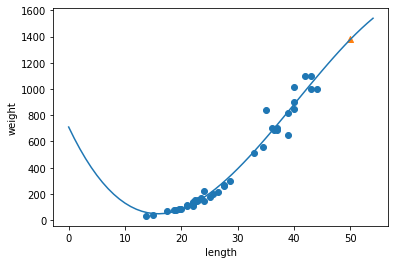

In [70]:
point = np.arange(0,55)
plt.scatter(train_input,train_target)
plt.plot(point, lr.coef_[0]*point**3 + lr.coef_[1]*point**2 + lr.coef_[2]*point + lr.intercept_)
plt.scatter(50,1379.4,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [71]:
print(lr.score(train_3poly, train_target))
print(lr.score(test_3poly, test_target))

0.9729178478354533
0.9588363727422974


길이가 10 이하일 때 무게가 더 늘어나는 문제가 더 심해졌고  
2차 방정식으로 할 때 전체적으로 더 점수가 높지만  
2차는 테스트 점수가 더 높은 것으로 보아 과소적합문제있다  
**더 고차항을 넣어야 할 것 같은데 얼만큼 더 고차항을 넣어야 할지 모르고 수동으로 이렇게 고차항을 넣기도 힘들다**

## 다중 회귀
multiple regression
>여러 개의 특성을 사용한 선형 회귀

### 특성공학
feature engineering  
>PolynomialFeatures 클래스 사용


In [78]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [79]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

사이킷런 변환기
>특성을 만들거나 전처리하기 위한 다양한 클래스  

사이킷런의 모델 클래스는 추정기(estimator)라고도 부른다

In [80]:
# 다항 특성 만들기
from sklearn.preprocessing import PolynomialFeatures

# degree=2
poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [81]:
# 절편을 위한 항 제거
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시하므로 지정하지 않아도 된다.

In [88]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [89]:
# 특성 조합 반환 (x0은 첫번째, x1은 두번째, ...)
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [90]:
poly = PolynomialFeatures(include_bias=True)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
poly.get_feature_names_out()

(42, 10)


array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [91]:
test_poly = poly.transform(test_input)

**꼭 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 들이자!!**

In [92]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [93]:
print(lr.score(train_poly,train_target))

0.9903183436982125


In [94]:
print(lr.score(test_poly,test_target))

0.9714559911594081


테스트 세트의 점수는 비슷하지만 훈련 점수가 높아지면서 과소적합 문제는 사라졌다.

In [95]:
# 5제곱까지 특성 만들기
poly = PolynomialFeatures(degree=5, include_bias=False)
train_5poly = poly.fit_transform(train_input)
test_5poly = poly.transform(test_input)
print(train_5poly.shape, test_5poly.shape)

(42, 55) (14, 55)


In [96]:
lr.fit(train_5poly, train_target)
print(lr.score(train_5poly,train_target))

0.9999999999991097


In [97]:
print(lr.score(test_5poly, test_target))

-144.40579242684848


훈련 세트에 너무 과대적합되어 테스트 세트에서는 형편없는 점수를 만들었다

### 특성 스케일
데이터 정규화
>StandardScaler 클래스

In [99]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_5poly)
train_scaled = ss.transform(train_5poly)
test_scaled = ss.transform(test_5poly)

### 규제
선형 회귀 모델에서 규제를 추가한 모델을 **릿지ridge**와 **라쏘lasso**라고 부른다.  
**릿지(L2)**는 계수를 제곱한 값을 기준으로 규제를 적용하여 기울기를 0으로 절대 만들지 않는다.  
**라쏘(L1)**는 계수의 절대값을 기준으로 규제를 적용하여 기울기를 0으로 만들 수도 있다.


#### 릿지 회귀

In [100]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled,train_target))

0.9896101671037343


In [101]:
print(ridge.score(test_scaled,test_target))

0.9790693977615397


**최적 alpha값 찾기**  
하이퍼 파라미터
* 머신러닝 알고리즘이 학습하지 않는 파라미터  
* 사람이 사전에 지정해야 한다.
* 릿지 회귀에서 alpha

모델 파라미터
* 머신러닝 알고리즘이 학습하는 파라미터
* 선형 회귀에서 coef_와 intercept_

In [103]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

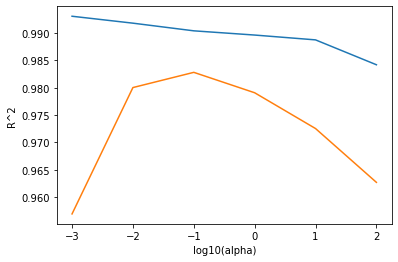

In [104]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

In [105]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570366
0.9827976465386926


In [114]:
print(np.sum(ridge.coef_ == 0))

0


In [115]:
print(ridge.coef_)

[ 27.61933479  -1.64022156 -19.73256036  30.0306195   16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]


#### 라쏘 회귀

In [106]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [107]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


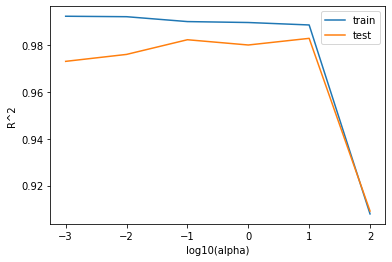

In [110]:
plt.plot(np.log10(alpha_list),train_score, label='train')
plt.plot(np.log10(alpha_list),test_score, label='test')
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [111]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [112]:
print(np.sum(lasso.coef_ == 0))

40


In [113]:
print(lasso.coef_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
